In [ ]:
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import os
from scipy.stats import chi2_contingency
%matplotlib inline
import numpy as np
import seaborn as sns
import igraph as ig
from scipy.spatial.distance import cdist
import netplotbrain
from nilearn import datasets
from nilearn import plotting
from scipy.stats import zscore
import laBIBILaRORO as lbr
from importlib import reload
#reload(lbr)

In [2]:
DIR=os.path.join("/NAS","tupac","protocoles","PULSE")

df_roi = pd.read_csv(os.path.join("/NAS","dumbo","protocoles","FAIRPARKII","Coord_ROI_atlas_inMNI.csv"))
#df_roi = df_roi.drop('Name_inFP2', axis=1)
df_roi.set_index('Name_inFP2', inplace=True)

file_path = '/NAS/tupac/romain/MNI_Glasser_extHCP_etc/HCP-MMP1_UniqueRegionList.csv'
df_exthcp = pd.read_csv(file_path)
#print(df_exthcp.head())  # Affiche les premières lignes du DataFrame

file_path = '/NAS/tupac/romain/MNI_Glasser_extHCP_etc/Glasser_2016_Table-1.xlsx'
df_gla = pd.read_excel(file_path)
df_gla


sinon pour volbrain regarder /NAS/tupac/romain/segMNIbyVolbrain/README.pdf

In [ ]:
vb_regions_dict = {
    "3rd ventricle": 4,
    "4th ventricle": 11,
    "Right accumbens": 23,
    "Right amygdala": 31,
    "Brainstem": 35,
    "Right caudate": 36,
    "Right cerebellum exterior": 38,
    "Right cerebellum White Matter": 40,
    "Right cerebral White Matter": 44,
    "Right hippocampus": 47,
    "Right inf. lateral ventricle": 49,
    "Right lateral ventricle": 51,
    "Right pallidum": 55,
    "Right putamen": 57,
    "Right thalamus": 59,
    "Right ventral DC": 61,
    "Lobules I-V": 71,
    "Lobules VIII-X": 73,
    "Left basal forebrain": 75,
    "Right anterior cingulate gyrus": 100,
    "Right anterior insula": 102,
    "Right anterior orbital gyrus": 104,
    "Right angular gyrus": 106,
    "Right calcarine cortex": 108,
    "Right central operculum": 112,
    "Right cuneus": 114,
    "Right entorhinal area": 116,
    "Right frontal operculum": 118,
    "Right frontal pole": 120,
    "Right fusiform gyrus": 122,
    "Right gyrus rectus": 124,
    "Right inf. occipital gyrus": 128,
    "Right inf. temporal gyrus": 132,
    "Left accumbens": 30,
    "Left amygdala": 32,
    "Left caudate": 37,
    "Left cerebellum exterior": 39,
    "Left cerebellum White Matter": 41,
    "Left cerebral White Matter": 45,
    "Left hippocampus": 48,
    "Left inf. lateral ventricle": 50,
    "Left lateral ventricle": 52,
    "Left pallidum": 56,
    "Left putamen": 58,
    "Left thalamus": 60,
    "Left ventral DC": 62,
    "Lobules VI-VII": 72,
    "Right basal forebrain": 76,
    "Left anterior cingulate gyrus": 101,
    "Left anterior insula": 103,
    "Left anterior orbital gyrus": 105,
    "Left angular gyrus": 107,
    "Left calcarine cortex": 109,
    "Left central operculum": 113,
    "Left cuneus": 115,
    "Left entorhinal area": 117,
    "Left frontal operculum": 119,
    "Left frontal pole": 121,
    "Left fusiform gyrus": 123,
    "Left gyrus rectus": 125,
    "Left inf. occipital gyrus": 129,
    "Left inf. temporal gyrus": 133,
    "Right lingual gyrus": 134,
    "Right lateral orbital gyrus": 136,
    "Right middle cingulate gyrus": 138,
    "Right medial frontal cortex": 140,
    "Right middle frontal gyrus": 142,
    "Right middle occipital gyrus": 144,
    "Right medial orbital gyrus": 146,
    "Right postcentral gyrus medial segment": 148,
    "Right precentral gyrus medial segment": 150,
    "Right sup. frontal gyrus medial segment": 152,
    "Right middle temporal gyrus": 154,
    "Right occipital pole": 156,
    "Right occipital fusiform gyrus": 160,
    "Right opercular inf. frontal gyrus": 162,
    "Right orbital inf. frontal gyrus": 164,
    "Right posterior cingulate gyrus": 166,
    "Right precuneus": 168,
    "Right parahippocampal gyrus": 170,
    "Right posterior insula": 172,
    "Right parietal operculum": 174,
    "Right postcentral gyrus": 176,
    "Right posterior orbital gyrus": 178,
    "Right planum polare": 180,
    "Right precentral gyrus": 182,
    "Right planum temporale": 184,
    "Right subcallosal area": 186,
    "Right sup. frontal gyrus": 190,
    "Right supplementary motor cortex": 192,
    "Right supramarginal gyrus": 194,
    "Right sup. occipital gyrus": 196,
    "Right sup. parietal lobule": 198,
    "Left lingual gyrus": 135,
    "Left lateral orbital gyrus": 137,
    "Left middle cingulate gyrus": 139,
    "Left medial frontal cortex": 141,
    "Left middle frontal gyrus": 143,
    "Left middle occipital gyrus": 145,
    "Left medial orbital gyrus": 147,
    "Left postcentral gyrus medial segment": 149,
    "Left precentral gyrus medial segment": 151,
    "Left sup. frontal gyrus medial segment": 153,
    "Left middle temporal gyrus": 155,
    "Left occipital pole": 157,
    "Left occipital fusiform gyrus": 161,
    "Left opercular inf. frontal gyrus": 163,
    "Left orbital inf. frontal gyrus": 165,
    "Left posterior cingulate gyrus": 167,
    "Left precuneus": 169,
    "Left parahippocampal gyrus": 171,
    "Left posterior insula": 173,
    "Left parietal operculum": 175,
    "Left postcentral gyrus": 177,
    "Left posterior orbital gyrus": 179,
    "Left planum polare": 181,
    "Left precentral gyrus": 183,
    "Left planum temporale": 185,
    "Left subcallosal area": 187,
    "Left sup. frontal gyrus": 191,
    "Left supplementary motor cortex": 193,
    "Left supramarginal gyrus": 195,
    "Left sup. occipital gyrus": 197,
    "Left sup. parietal lobule": 199,
    "Left sup. temporal gyrus": 201,
    "Left temporal pole": 203,
    "Left triangular inf. frontal gyrus": 205,
    "Left transverse temporal gyrus": 207
}

In [29]:
vb_regions_dict = {key.replace(" ", "_"): value for key, value in vb_regions_dict.items()}

In [30]:
amygdala_hippocampus_regions = {key: value for key, value in vb_regions_dict.items() if "amygdala" in key.lower() or "hippocampus" in key.lower()}
print(amygdala_hippocampus_regions)

{'Right_amygdala': 31, 'Right_hippocampus': 47, 'Left_amygdala': 32, 'Left_hippocampus': 48}


In [31]:
for key_id,region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {key_id,region_id}")

Processing region ID: ('Right_amygdala', 31)
Processing region ID: ('Right_hippocampus', 47)
Processing region ID: ('Left_amygdala', 32)
Processing region ID: ('Left_hippocampus', 48)


In [32]:
import glob
import pandas as pd
import nibabel as nib
import numpy as np
import os
from scipy.stats import kurtosis
from tqdm import tqdm

# Define the path pattern
pattern = os.path.join(DIR, "QSM", "sub-*", "r_qsm_ChimapWarped.nii.gz")

# Find all matching files
files = glob.glob(pattern)

# Initialize a list to store data for all subjects
all_data = []

# Iterate over each file
# Create a progress bar
for fileQSM in tqdm(files, desc="Processing subjects"):
    SUBJ = fileQSM.split("/")[-2]
    fileVolbrain = os.path.join(DIR, "Volbrain", f"native_structures_{SUBJ}_ses-M000_space-nativepro_T1w.nii.gz")
    fileR2 = fileQSM.replace("r_qsm_ChimapWarped.nii.gz", "r_R2map_s-1Warped.nii.gz")
    if os.path.exists(fileVolbrain) and os.path.exists(fileQSM) and os.path.exists(fileR2):
        print(f"Processing files : {SUBJ} {fileQSM} {fileR2}")
        
        # Initialize a dictionary to store data for the current subject
        data = {'SUBJ': SUBJ}

        # Load the Volbrain file
        volbrain_img = nib.load(fileVolbrain)
        volbrain_data = volbrain_img.get_fdata()

        # Extract volumes for each region in amygdala_hippocampus_regions
        for region_name, region_id in amygdala_hippocampus_regions.items():
            region_volume = (volbrain_data == region_id).sum()
            data[f"{region_name}_volume"] = region_volume

        # Load the R2 and QSM files
        r2_img = nib.load(fileR2)
        r2_data = r2_img.get_fdata()

        qsm_img = nib.load(fileQSM)
        qsm_data = qsm_img.get_fdata()

        # Compute median and mean for R2 and QSM in each region
        for region_name, region_id in amygdala_hippocampus_regions.items():
            region_mask = volbrain_data == region_id
            r2_values = r2_data[region_mask]
            qsm_values = qsm_data[region_mask]

            data[f"{region_name}_R2_median"] = np.median(r2_values)
            data[f"{region_name}_R2_mean"] = np.mean(r2_values)
            data[f"{region_name}_QSM_median"] = np.median(qsm_values)
            data[f"{region_name}_QSM_mean"] = np.mean(qsm_values)
            
            # Compute median and mean for QSM (using only positive values)
            positive_qsm_values = qsm_values[qsm_values > 0]
            data[f"{region_name}_QSM_positive_median"] = np.median(positive_qsm_values) if positive_qsm_values.size > 0 else np.nan
            data[f"{region_name}_QSM_positive_mean"] = np.mean(positive_qsm_values) if positive_qsm_values.size > 0 else np.nan
            # Compute kurtosis for QSM in each region
            data[f"{region_name}_QSM_kurtosis"] = kurtosis(qsm_values, fisher=True, nan_policy='omit')
            
            # Compute kurtosis for QSM 
            data[f"{region_name}_QSM_kurtosis"] = kurtosis(qsm_values, fisher=True, nan_policy='omit') if qsm_values.size > 0 else np.nan
        # Append the data for the current subject to the list
        all_data.append(data)
    else:
        print(f"Missing files for {SUBJ} : {fileQSM} {fileR2} or {fileVolbrain}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(all_data).set_index('SUBJ')
print(df)

Processing subjects:   0%|          | 0/191 [00:00<?, ?it/s]

Processing files : sub-01144GMP /NAS/tupac/protocoles/PULSE/QSM/sub-01144GMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01144GMP/r_R2map_s-1Warped.nii.gz


Processing subjects:   1%|          | 1/191 [00:01<04:03,  1.28s/it]

Processing files : sub-01141JNP /NAS/tupac/protocoles/PULSE/QSM/sub-01141JNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01141JNP/r_R2map_s-1Warped.nii.gz


Processing subjects:   1%|          | 2/191 [00:02<04:14,  1.35s/it]

Processing files : sub-01150GNP /NAS/tupac/protocoles/PULSE/QSM/sub-01150GNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01150GNP/r_R2map_s-1Warped.nii.gz


Processing subjects:   2%|▏         | 3/191 [00:04<04:17,  1.37s/it]

Processing files : sub-01161FJP /NAS/tupac/protocoles/PULSE/QSM/sub-01161FJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01161FJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   2%|▏         | 4/191 [00:05<04:02,  1.30s/it]

Processing files : sub-01049DJP /NAS/tupac/protocoles/PULSE/QSM/sub-01049DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01049DJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   3%|▎         | 5/191 [00:06<03:48,  1.23s/it]

Processing files : sub-01080PAP /NAS/tupac/protocoles/PULSE/QSM/sub-01080PAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01080PAP/r_R2map_s-1Warped.nii.gz


Processing subjects:   3%|▎         | 6/191 [00:07<03:46,  1.22s/it]

Processing files : sub-01075LJP /NAS/tupac/protocoles/PULSE/QSM/sub-01075LJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01075LJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   4%|▎         | 7/191 [00:08<03:45,  1.23s/it]

Processing files : sub-01099GFP /NAS/tupac/protocoles/PULSE/QSM/sub-01099GFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01099GFP/r_R2map_s-1Warped.nii.gz


Processing subjects:   4%|▍         | 8/191 [00:10<03:55,  1.28s/it]

Processing files : sub-01129VHP /NAS/tupac/protocoles/PULSE/QSM/sub-01129VHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01129VHP/r_R2map_s-1Warped.nii.gz


Processing subjects:   5%|▍         | 9/191 [00:11<03:49,  1.26s/it]

Processing files : sub-01077QDP /NAS/tupac/protocoles/PULSE/QSM/sub-01077QDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01077QDP/r_R2map_s-1Warped.nii.gz


Processing subjects:   5%|▌         | 10/191 [00:12<03:42,  1.23s/it]

Processing files : sub-01068DJP /NAS/tupac/protocoles/PULSE/QSM/sub-01068DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01068DJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   6%|▌         | 11/191 [00:13<03:36,  1.20s/it]

Processing files : sub-01138DAP /NAS/tupac/protocoles/PULSE/QSM/sub-01138DAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01138DAP/r_R2map_s-1Warped.nii.gz


Processing subjects:   6%|▋         | 12/191 [00:14<03:35,  1.20s/it]

Processing files : sub-01133GSP /NAS/tupac/protocoles/PULSE/QSM/sub-01133GSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01133GSP/r_R2map_s-1Warped.nii.gz


Processing subjects:   7%|▋         | 13/191 [00:16<03:36,  1.21s/it]

Processing files : sub-01095GSP /NAS/tupac/protocoles/PULSE/QSM/sub-01095GSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01095GSP/r_R2map_s-1Warped.nii.gz


Processing subjects:   7%|▋         | 14/191 [00:17<03:29,  1.18s/it]

Processing files : sub-01007LAP /NAS/tupac/protocoles/PULSE/QSM/sub-01007LAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01007LAP/r_R2map_s-1Warped.nii.gz


Processing subjects:   8%|▊         | 15/191 [00:18<03:24,  1.16s/it]

Processing files : sub-01123MJP /NAS/tupac/protocoles/PULSE/QSM/sub-01123MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01123MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   8%|▊         | 16/191 [00:19<03:22,  1.15s/it]

Processing files : sub-01156CMP /NAS/tupac/protocoles/PULSE/QSM/sub-01156CMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01156CMP/r_R2map_s-1Warped.nii.gz


Processing subjects:   9%|▉         | 17/191 [00:20<03:24,  1.17s/it]

Processing files : sub-01159MPP /NAS/tupac/protocoles/PULSE/QSM/sub-01159MPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01159MPP/r_R2map_s-1Warped.nii.gz


Processing subjects:   9%|▉         | 18/191 [00:21<03:23,  1.18s/it]

Processing files : sub-01126WRP /NAS/tupac/protocoles/PULSE/QSM/sub-01126WRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01126WRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  10%|▉         | 19/191 [00:23<03:23,  1.18s/it]

Processing files : sub-01162CYP /NAS/tupac/protocoles/PULSE/QSM/sub-01162CYP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01162CYP/r_R2map_s-1Warped.nii.gz


Processing subjects:  10%|█         | 20/191 [00:24<03:22,  1.18s/it]

Processing files : sub-01160MAP /NAS/tupac/protocoles/PULSE/QSM/sub-01160MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01160MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  11%|█         | 21/191 [00:25<03:24,  1.20s/it]

Processing files : sub-01084TBP /NAS/tupac/protocoles/PULSE/QSM/sub-01084TBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01084TBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  12%|█▏        | 22/191 [00:26<03:24,  1.21s/it]

Processing files : sub-01043PMP /NAS/tupac/protocoles/PULSE/QSM/sub-01043PMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01043PMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  12%|█▏        | 23/191 [00:27<03:20,  1.19s/it]

Processing files : sub-01024GJP /NAS/tupac/protocoles/PULSE/QSM/sub-01024GJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01024GJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  13%|█▎        | 24/191 [00:29<03:17,  1.18s/it]

Processing files : sub-01139DMP /NAS/tupac/protocoles/PULSE/QSM/sub-01139DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01139DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  13%|█▎        | 25/191 [00:30<03:13,  1.17s/it]

Processing files : sub-01149ATP /NAS/tupac/protocoles/PULSE/QSM/sub-01149ATP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01149ATP/r_R2map_s-1Warped.nii.gz


Processing subjects:  14%|█▎        | 26/191 [00:31<03:12,  1.16s/it]

Processing files : sub-01006SCP /NAS/tupac/protocoles/PULSE/QSM/sub-01006SCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01006SCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  14%|█▍        | 27/191 [00:32<03:11,  1.17s/it]

Processing files : sub-01128DLP /NAS/tupac/protocoles/PULSE/QSM/sub-01128DLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01128DLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  15%|█▍        | 28/191 [00:33<03:09,  1.16s/it]

Processing files : sub-01082DMP /NAS/tupac/protocoles/PULSE/QSM/sub-01082DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01082DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  15%|█▌        | 29/191 [00:34<03:13,  1.20s/it]

Processing files : sub-01158FMP /NAS/tupac/protocoles/PULSE/QSM/sub-01158FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01158FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  16%|█▌        | 30/191 [00:36<03:11,  1.19s/it]

Processing files : sub-01152DPP /NAS/tupac/protocoles/PULSE/QSM/sub-01152DPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01152DPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  16%|█▌        | 31/191 [00:37<03:09,  1.19s/it]

Processing files : sub-01155SPP /NAS/tupac/protocoles/PULSE/QSM/sub-01155SPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01155SPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  17%|█▋        | 32/191 [00:38<03:08,  1.19s/it]

Processing files : sub-01146VYP /NAS/tupac/protocoles/PULSE/QSM/sub-01146VYP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01146VYP/r_R2map_s-1Warped.nii.gz


Processing subjects:  17%|█▋        | 33/191 [00:39<03:10,  1.20s/it]

Processing files : sub-01163BAP /NAS/tupac/protocoles/PULSE/QSM/sub-01163BAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01163BAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  18%|█▊        | 34/191 [00:40<03:07,  1.20s/it]

Processing files : sub-01166MJP /NAS/tupac/protocoles/PULSE/QSM/sub-01166MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01166MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  18%|█▊        | 35/191 [00:42<03:04,  1.19s/it]

Processing files : sub-01167DLP /NAS/tupac/protocoles/PULSE/QSM/sub-01167DLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01167DLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  19%|█▉        | 36/191 [00:43<03:02,  1.18s/it]

Processing files : sub-01168GJP /NAS/tupac/protocoles/PULSE/QSM/sub-01168GJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01168GJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  19%|█▉        | 37/191 [00:44<03:03,  1.19s/it]

Processing files : sub-01169LVP /NAS/tupac/protocoles/PULSE/QSM/sub-01169LVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01169LVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  20%|█▉        | 38/191 [00:45<03:14,  1.27s/it]

Processing files : sub-01170CTP /NAS/tupac/protocoles/PULSE/QSM/sub-01170CTP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01170CTP/r_R2map_s-1Warped.nii.gz


Processing subjects:  20%|██        | 39/191 [00:47<03:18,  1.31s/it]

Processing files : sub-01172HRP /NAS/tupac/protocoles/PULSE/QSM/sub-01172HRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01172HRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  21%|██        | 40/191 [00:48<03:16,  1.30s/it]

Processing files : sub-01175RJP /NAS/tupac/protocoles/PULSE/QSM/sub-01175RJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01175RJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  21%|██▏       | 41/191 [00:50<03:23,  1.35s/it]

Processing files : sub-01173WGP /NAS/tupac/protocoles/PULSE/QSM/sub-01173WGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01173WGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  22%|██▏       | 42/191 [00:51<03:23,  1.37s/it]

Processing files : sub-01176KPP /NAS/tupac/protocoles/PULSE/QSM/sub-01176KPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01176KPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  23%|██▎       | 43/191 [00:52<03:23,  1.37s/it]

Processing files : sub-01178LDP /NAS/tupac/protocoles/PULSE/QSM/sub-01178LDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01178LDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  23%|██▎       | 44/191 [00:54<03:21,  1.37s/it]

Processing files : sub-01179DDP /NAS/tupac/protocoles/PULSE/QSM/sub-01179DDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01179DDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  24%|██▎       | 45/191 [00:55<03:19,  1.37s/it]

Processing files : sub-01186MJP /NAS/tupac/protocoles/PULSE/QSM/sub-01186MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01186MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  24%|██▍       | 46/191 [00:56<03:14,  1.34s/it]

Processing files : sub-01187VJP /NAS/tupac/protocoles/PULSE/QSM/sub-01187VJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01187VJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  25%|██▍       | 47/191 [00:58<03:15,  1.36s/it]

Processing files : sub-01188ABP /NAS/tupac/protocoles/PULSE/QSM/sub-01188ABP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01188ABP/r_R2map_s-1Warped.nii.gz


Processing subjects:  25%|██▌       | 48/191 [00:59<03:15,  1.37s/it]

Processing files : sub-01189DLP /NAS/tupac/protocoles/PULSE/QSM/sub-01189DLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01189DLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  26%|██▌       | 49/191 [01:01<03:15,  1.38s/it]

Processing files : sub-01192DJP /NAS/tupac/protocoles/PULSE/QSM/sub-01192DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01192DJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  26%|██▌       | 50/191 [01:02<03:12,  1.37s/it]

Processing files : sub-03002MGP /NAS/tupac/protocoles/PULSE/QSM/sub-03002MGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03002MGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  27%|██▋       | 51/191 [01:03<03:05,  1.33s/it]

Processing files : sub-02001HRP /NAS/tupac/protocoles/PULSE/QSM/sub-02001HRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-02001HRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  27%|██▋       | 52/191 [01:04<03:02,  1.32s/it]

Processing files : sub-03003MAP /NAS/tupac/protocoles/PULSE/QSM/sub-03003MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03003MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  28%|██▊       | 53/191 [01:06<02:58,  1.29s/it]

Processing files : sub-03004DBP /NAS/tupac/protocoles/PULSE/QSM/sub-03004DBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03004DBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  28%|██▊       | 54/191 [01:07<02:56,  1.29s/it]

Processing files : sub-03005VJP /NAS/tupac/protocoles/PULSE/QSM/sub-03005VJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03005VJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  29%|██▉       | 55/191 [01:08<02:55,  1.29s/it]

Processing files : sub-03006SFP /NAS/tupac/protocoles/PULSE/QSM/sub-03006SFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03006SFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  29%|██▉       | 56/191 [01:10<02:52,  1.28s/it]

Processing files : sub-03007AFP /NAS/tupac/protocoles/PULSE/QSM/sub-03007AFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03007AFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  30%|██▉       | 57/191 [01:11<02:52,  1.29s/it]

Processing files : sub-03009BCP /NAS/tupac/protocoles/PULSE/QSM/sub-03009BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03009BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  30%|███       | 58/191 [01:12<02:52,  1.30s/it]

Processing files : sub-03010BFP /NAS/tupac/protocoles/PULSE/QSM/sub-03010BFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03010BFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  31%|███       | 59/191 [01:14<02:53,  1.31s/it]

Processing files : sub-03011MJP /NAS/tupac/protocoles/PULSE/QSM/sub-03011MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03011MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  31%|███▏      | 60/191 [01:15<02:50,  1.30s/it]

Processing files : sub-03012CCP /NAS/tupac/protocoles/PULSE/QSM/sub-03012CCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03012CCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  32%|███▏      | 61/191 [01:16<02:50,  1.31s/it]

Processing files : sub-03013DCP /NAS/tupac/protocoles/PULSE/QSM/sub-03013DCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03013DCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  32%|███▏      | 62/191 [01:17<02:49,  1.32s/it]

Processing files : sub-03014PHP /NAS/tupac/protocoles/PULSE/QSM/sub-03014PHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03014PHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  33%|███▎      | 63/191 [01:19<02:46,  1.30s/it]

Processing files : sub-03015RAP /NAS/tupac/protocoles/PULSE/QSM/sub-03015RAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03015RAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  34%|███▎      | 64/191 [01:20<02:47,  1.32s/it]

Processing files : sub-03016MEP /NAS/tupac/protocoles/PULSE/QSM/sub-03016MEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03016MEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  34%|███▍      | 65/191 [01:21<02:44,  1.31s/it]

Processing files : sub-03018MAP /NAS/tupac/protocoles/PULSE/QSM/sub-03018MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03018MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  35%|███▍      | 66/191 [01:23<02:41,  1.29s/it]

Processing files : sub-03019JJP /NAS/tupac/protocoles/PULSE/QSM/sub-03019JJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03019JJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  35%|███▌      | 67/191 [01:24<02:38,  1.28s/it]

Processing files : sub-03020PGP /NAS/tupac/protocoles/PULSE/QSM/sub-03020PGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03020PGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  36%|███▌      | 68/191 [01:25<02:38,  1.29s/it]

Processing files : sub-03022ABP /NAS/tupac/protocoles/PULSE/QSM/sub-03022ABP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03022ABP/r_R2map_s-1Warped.nii.gz


Processing subjects:  36%|███▌      | 69/191 [01:26<02:36,  1.28s/it]

Processing files : sub-03021TSP /NAS/tupac/protocoles/PULSE/QSM/sub-03021TSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03021TSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  37%|███▋      | 70/191 [01:28<02:34,  1.27s/it]

Processing files : sub-03023PPP /NAS/tupac/protocoles/PULSE/QSM/sub-03023PPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03023PPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  37%|███▋      | 71/191 [01:29<02:35,  1.29s/it]

Processing files : sub-03025PVP /NAS/tupac/protocoles/PULSE/QSM/sub-03025PVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03025PVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  38%|███▊      | 72/191 [01:30<02:32,  1.28s/it]

Processing files : sub-03024LVP /NAS/tupac/protocoles/PULSE/QSM/sub-03024LVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03024LVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  38%|███▊      | 73/191 [01:32<02:35,  1.32s/it]

Processing files : sub-03029PLP /NAS/tupac/protocoles/PULSE/QSM/sub-03029PLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03029PLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  39%|███▊      | 74/191 [01:33<02:33,  1.31s/it]

Processing files : sub-03031TMP /NAS/tupac/protocoles/PULSE/QSM/sub-03031TMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03031TMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  39%|███▉      | 75/191 [01:34<02:31,  1.30s/it]

Processing files : sub-03035PRP /NAS/tupac/protocoles/PULSE/QSM/sub-03035PRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03035PRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  40%|███▉      | 76/191 [01:36<02:28,  1.29s/it]

Processing files : sub-03037LNP /NAS/tupac/protocoles/PULSE/QSM/sub-03037LNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03037LNP/r_R2map_s-1Warped.nii.gz


Processing subjects:  40%|████      | 77/191 [01:37<02:27,  1.30s/it]

Processing files : sub-03039DAP /NAS/tupac/protocoles/PULSE/QSM/sub-03039DAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03039DAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  41%|████      | 78/191 [01:38<02:24,  1.28s/it]

Processing files : sub-03036DRP /NAS/tupac/protocoles/PULSE/QSM/sub-03036DRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03036DRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  41%|████▏     | 79/191 [01:39<02:25,  1.30s/it]

Processing files : sub-03038FMP /NAS/tupac/protocoles/PULSE/QSM/sub-03038FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03038FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  42%|████▏     | 80/191 [01:41<02:23,  1.29s/it]

Processing files : sub-03041LIP /NAS/tupac/protocoles/PULSE/QSM/sub-03041LIP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03041LIP/r_R2map_s-1Warped.nii.gz


Processing subjects:  42%|████▏     | 81/191 [01:42<02:20,  1.28s/it]

Processing files : sub-03040DMP /NAS/tupac/protocoles/PULSE/QSM/sub-03040DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03040DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  43%|████▎     | 82/191 [01:43<02:18,  1.27s/it]

Processing files : sub-03044VGP /NAS/tupac/protocoles/PULSE/QSM/sub-03044VGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03044VGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  43%|████▎     | 83/191 [01:44<02:15,  1.26s/it]

Processing files : sub-03043DMP /NAS/tupac/protocoles/PULSE/QSM/sub-03043DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03043DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  44%|████▍     | 84/191 [01:46<02:14,  1.26s/it]

Processing files : sub-03047BDP /NAS/tupac/protocoles/PULSE/QSM/sub-03047BDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03047BDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  45%|████▍     | 85/191 [01:47<02:12,  1.25s/it]

Processing files : sub-03049RCP /NAS/tupac/protocoles/PULSE/QSM/sub-03049RCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03049RCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  45%|████▌     | 86/191 [01:48<02:09,  1.24s/it]

Processing files : sub-03059BMP /NAS/tupac/protocoles/PULSE/QSM/sub-03059BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03059BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  46%|████▌     | 87/191 [01:49<02:09,  1.25s/it]

Processing files : sub-03055LEP /NAS/tupac/protocoles/PULSE/QSM/sub-03055LEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03055LEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  46%|████▌     | 88/191 [01:51<02:08,  1.24s/it]

Processing files : sub-03062LEP /NAS/tupac/protocoles/PULSE/QSM/sub-03062LEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03062LEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  47%|████▋     | 89/191 [01:52<02:05,  1.23s/it]

Processing files : sub-03063BGP /NAS/tupac/protocoles/PULSE/QSM/sub-03063BGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03063BGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  47%|████▋     | 90/191 [01:53<02:04,  1.23s/it]

Processing files : sub-03064BPP /NAS/tupac/protocoles/PULSE/QSM/sub-03064BPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03064BPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  48%|████▊     | 91/191 [01:54<02:05,  1.26s/it]

Processing files : sub-03065MBP /NAS/tupac/protocoles/PULSE/QSM/sub-03065MBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03065MBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  48%|████▊     | 92/191 [01:56<02:05,  1.27s/it]

Processing files : sub-04001RCP /NAS/tupac/protocoles/PULSE/QSM/sub-04001RCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04001RCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  49%|████▊     | 93/191 [01:57<02:02,  1.25s/it]

Processing files : sub-04002MAP /NAS/tupac/protocoles/PULSE/QSM/sub-04002MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04002MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  49%|████▉     | 94/191 [01:58<02:00,  1.24s/it]

Processing files : sub-04005PHP /NAS/tupac/protocoles/PULSE/QSM/sub-04005PHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04005PHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  50%|████▉     | 95/191 [01:59<02:02,  1.27s/it]

Processing files : sub-04009RSP /NAS/tupac/protocoles/PULSE/QSM/sub-04009RSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04009RSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  50%|█████     | 96/191 [02:01<02:01,  1.27s/it]

Processing files : sub-04006DCP /NAS/tupac/protocoles/PULSE/QSM/sub-04006DCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04006DCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  51%|█████     | 97/191 [02:02<02:01,  1.29s/it]

Processing files : sub-04011BSP /NAS/tupac/protocoles/PULSE/QSM/sub-04011BSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04011BSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  51%|█████▏    | 98/191 [02:03<01:59,  1.29s/it]

Processing files : sub-04013LJP /NAS/tupac/protocoles/PULSE/QSM/sub-04013LJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04013LJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  52%|█████▏    | 99/191 [02:05<01:56,  1.27s/it]

Processing files : sub-04017RPP /NAS/tupac/protocoles/PULSE/QSM/sub-04017RPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04017RPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  52%|█████▏    | 100/191 [02:06<01:55,  1.27s/it]

Processing files : sub-04015BMP /NAS/tupac/protocoles/PULSE/QSM/sub-04015BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04015BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  53%|█████▎    | 101/191 [02:07<01:52,  1.25s/it]

Processing files : sub-04018SPP /NAS/tupac/protocoles/PULSE/QSM/sub-04018SPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04018SPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  53%|█████▎    | 102/191 [02:08<01:51,  1.25s/it]

Processing files : sub-04019NFP /NAS/tupac/protocoles/PULSE/QSM/sub-04019NFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04019NFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  54%|█████▍    | 103/191 [02:10<01:51,  1.27s/it]

Processing files : sub-09057APP /NAS/tupac/protocoles/PULSE/QSM/sub-09057APP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09057APP/r_R2map_s-1Warped.nii.gz


Processing subjects:  54%|█████▍    | 104/191 [02:11<01:52,  1.29s/it]

Processing files : sub-09066RSP /NAS/tupac/protocoles/PULSE/QSM/sub-09066RSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09066RSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  55%|█████▍    | 105/191 [02:12<01:48,  1.26s/it]

Processing files : sub-09064JSP /NAS/tupac/protocoles/PULSE/QSM/sub-09064JSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09064JSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  55%|█████▌    | 106/191 [02:13<01:49,  1.29s/it]

Processing files : sub-09075CMP /NAS/tupac/protocoles/PULSE/QSM/sub-09075CMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09075CMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  56%|█████▌    | 107/191 [02:15<01:50,  1.31s/it]

Processing files : sub-09076CDP /NAS/tupac/protocoles/PULSE/QSM/sub-09076CDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09076CDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  57%|█████▋    | 108/191 [02:16<01:48,  1.31s/it]

Processing files : sub-09099CJP /NAS/tupac/protocoles/PULSE/QSM/sub-09099CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09099CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  57%|█████▋    | 109/191 [02:17<01:45,  1.29s/it]

Processing files : sub-10004CCP /NAS/tupac/protocoles/PULSE/QSM/sub-10004CCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10004CCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  58%|█████▊    | 110/191 [02:19<01:46,  1.31s/it]

Processing files : sub-10007BYP /NAS/tupac/protocoles/PULSE/QSM/sub-10007BYP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10007BYP/r_R2map_s-1Warped.nii.gz


Processing subjects:  58%|█████▊    | 111/191 [02:20<01:44,  1.31s/it]

Processing files : sub-10009LJP /NAS/tupac/protocoles/PULSE/QSM/sub-10009LJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10009LJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  59%|█████▊    | 112/191 [02:21<01:43,  1.31s/it]

Processing files : sub-10014BSP /NAS/tupac/protocoles/PULSE/QSM/sub-10014BSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10014BSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  59%|█████▉    | 113/191 [02:23<01:44,  1.33s/it]

Processing files : sub-10018CAP /NAS/tupac/protocoles/PULSE/QSM/sub-10018CAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10018CAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  60%|█████▉    | 114/191 [02:24<01:43,  1.35s/it]

Processing files : sub-10019TCP /NAS/tupac/protocoles/PULSE/QSM/sub-10019TCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10019TCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  60%|██████    | 115/191 [02:25<01:41,  1.34s/it]

Processing files : sub-10030CAP /NAS/tupac/protocoles/PULSE/QSM/sub-10030CAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10030CAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  61%|██████    | 116/191 [02:27<01:42,  1.37s/it]

Processing files : sub-13001KBP /NAS/tupac/protocoles/PULSE/QSM/sub-13001KBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13001KBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  61%|██████▏   | 117/191 [02:28<01:40,  1.36s/it]

Processing files : sub-13002BSP /NAS/tupac/protocoles/PULSE/QSM/sub-13002BSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13002BSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  62%|██████▏   | 118/191 [02:30<01:37,  1.34s/it]

Processing files : sub-13003EGP /NAS/tupac/protocoles/PULSE/QSM/sub-13003EGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13003EGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  62%|██████▏   | 119/191 [02:31<01:34,  1.32s/it]

Processing files : sub-13004DFP /NAS/tupac/protocoles/PULSE/QSM/sub-13004DFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13004DFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  63%|██████▎   | 120/191 [02:32<01:32,  1.30s/it]

Processing files : sub-13008BMP /NAS/tupac/protocoles/PULSE/QSM/sub-13008BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13008BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  63%|██████▎   | 121/191 [02:33<01:28,  1.27s/it]

Processing files : sub-13009MPP /NAS/tupac/protocoles/PULSE/QSM/sub-13009MPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13009MPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  64%|██████▍   | 122/191 [02:35<01:29,  1.30s/it]

Processing files : sub-13010NSP /NAS/tupac/protocoles/PULSE/QSM/sub-13010NSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13010NSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  64%|██████▍   | 123/191 [02:36<01:27,  1.29s/it]

Processing files : sub-13011GHP /NAS/tupac/protocoles/PULSE/QSM/sub-13011GHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13011GHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  65%|██████▍   | 124/191 [02:37<01:25,  1.28s/it]

Processing files : sub-13012ZFP /NAS/tupac/protocoles/PULSE/QSM/sub-13012ZFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13012ZFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  65%|██████▌   | 125/191 [02:38<01:25,  1.30s/it]

Processing files : sub-13013VCP /NAS/tupac/protocoles/PULSE/QSM/sub-13013VCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13013VCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  66%|██████▌   | 126/191 [02:40<01:22,  1.27s/it]

Processing files : sub-13014PMP /NAS/tupac/protocoles/PULSE/QSM/sub-13014PMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13014PMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  66%|██████▋   | 127/191 [02:41<01:21,  1.27s/it]

Processing files : sub-15003FMP /NAS/tupac/protocoles/PULSE/QSM/sub-15003FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15003FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  67%|██████▋   | 128/191 [02:42<01:21,  1.29s/it]

Processing files : sub-15001GCP /NAS/tupac/protocoles/PULSE/QSM/sub-15001GCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15001GCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  68%|██████▊   | 129/191 [02:44<01:19,  1.27s/it]

Processing files : sub-15002OJP /NAS/tupac/protocoles/PULSE/QSM/sub-15002OJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15002OJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  68%|██████▊   | 130/191 [02:45<01:19,  1.30s/it]

Processing files : sub-15004CAP /NAS/tupac/protocoles/PULSE/QSM/sub-15004CAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15004CAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  69%|██████▊   | 131/191 [02:46<01:16,  1.28s/it]

Processing files : sub-15006ORP /NAS/tupac/protocoles/PULSE/QSM/sub-15006ORP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15006ORP/r_R2map_s-1Warped.nii.gz


Processing subjects:  69%|██████▉   | 132/191 [02:48<01:17,  1.31s/it]

Processing files : sub-15008BMP /NAS/tupac/protocoles/PULSE/QSM/sub-15008BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15008BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  70%|██████▉   | 133/191 [02:49<01:17,  1.34s/it]

Processing files : sub-19001LDP /NAS/tupac/protocoles/PULSE/QSM/sub-19001LDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19001LDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  70%|███████   | 134/191 [02:50<01:16,  1.33s/it]

Processing files : sub-19002APP /NAS/tupac/protocoles/PULSE/QSM/sub-19002APP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19002APP/r_R2map_s-1Warped.nii.gz


Processing subjects:  71%|███████   | 135/191 [02:52<01:14,  1.32s/it]

Processing files : sub-19003BJP /NAS/tupac/protocoles/PULSE/QSM/sub-19003BJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19003BJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  71%|███████   | 136/191 [02:53<01:12,  1.32s/it]

Processing files : sub-19004MMP /NAS/tupac/protocoles/PULSE/QSM/sub-19004MMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19004MMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  72%|███████▏  | 137/191 [02:54<01:10,  1.31s/it]

Processing files : sub-19005GJP /NAS/tupac/protocoles/PULSE/QSM/sub-19005GJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19005GJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  72%|███████▏  | 138/191 [02:55<01:09,  1.30s/it]

Processing files : sub-19006MBP /NAS/tupac/protocoles/PULSE/QSM/sub-19006MBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19006MBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  73%|███████▎  | 139/191 [02:57<01:09,  1.33s/it]

Processing files : sub-19008BCP /NAS/tupac/protocoles/PULSE/QSM/sub-19008BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19008BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  73%|███████▎  | 140/191 [02:58<01:08,  1.34s/it]

Processing files : sub-19010BCP /NAS/tupac/protocoles/PULSE/QSM/sub-19010BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19010BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  74%|███████▍  | 141/191 [03:00<01:07,  1.35s/it]

Processing files : sub-19011GMP /NAS/tupac/protocoles/PULSE/QSM/sub-19011GMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19011GMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  74%|███████▍  | 142/191 [03:01<01:05,  1.34s/it]

Processing files : sub-19015BMP /NAS/tupac/protocoles/PULSE/QSM/sub-19015BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19015BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  75%|███████▍  | 143/191 [03:02<01:01,  1.29s/it]

Processing files : sub-19016MJP /NAS/tupac/protocoles/PULSE/QSM/sub-19016MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19016MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  75%|███████▌  | 144/191 [03:03<01:00,  1.29s/it]

Processing files : sub-19017GLP /NAS/tupac/protocoles/PULSE/QSM/sub-19017GLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19017GLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  76%|███████▌  | 145/191 [03:05<00:59,  1.30s/it]

Processing files : sub-19018GDP /NAS/tupac/protocoles/PULSE/QSM/sub-19018GDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19018GDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  76%|███████▋  | 146/191 [03:06<01:00,  1.34s/it]

Processing files : sub-19019FNP /NAS/tupac/protocoles/PULSE/QSM/sub-19019FNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19019FNP/r_R2map_s-1Warped.nii.gz


Processing subjects:  77%|███████▋  | 147/191 [03:07<00:58,  1.32s/it]

Processing files : sub-19020MSP /NAS/tupac/protocoles/PULSE/QSM/sub-19020MSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19020MSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  77%|███████▋  | 148/191 [03:09<00:55,  1.29s/it]

Processing files : sub-19024AMP /NAS/tupac/protocoles/PULSE/QSM/sub-19024AMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19024AMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  78%|███████▊  | 149/191 [03:10<00:54,  1.31s/it]

Processing files : sub-19021AFP /NAS/tupac/protocoles/PULSE/QSM/sub-19021AFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19021AFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  79%|███████▊  | 150/191 [03:11<00:54,  1.32s/it]

Processing files : sub-19025AYT /NAS/tupac/protocoles/PULSE/QSM/sub-19025AYT/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19025AYT/r_R2map_s-1Warped.nii.gz


Processing subjects:  79%|███████▉  | 151/191 [03:13<00:52,  1.31s/it]

Processing files : sub-19027LRP /NAS/tupac/protocoles/PULSE/QSM/sub-19027LRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19027LRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  80%|███████▉  | 152/191 [03:14<00:52,  1.34s/it]

Processing files : sub-19026ORP /NAS/tupac/protocoles/PULSE/QSM/sub-19026ORP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19026ORP/r_R2map_s-1Warped.nii.gz


Processing subjects:  80%|████████  | 153/191 [03:15<00:50,  1.32s/it]

Processing files : sub-19028HCP /NAS/tupac/protocoles/PULSE/QSM/sub-19028HCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19028HCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  81%|████████  | 154/191 [03:17<00:47,  1.30s/it]

Processing files : sub-19029FJP /NAS/tupac/protocoles/PULSE/QSM/sub-19029FJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19029FJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  81%|████████  | 155/191 [03:18<00:46,  1.30s/it]

Processing files : sub-19030CJP /NAS/tupac/protocoles/PULSE/QSM/sub-19030CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19030CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  82%|████████▏ | 156/191 [03:19<00:44,  1.28s/it]

Processing files : sub-19031RPP /NAS/tupac/protocoles/PULSE/QSM/sub-19031RPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19031RPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  82%|████████▏ | 157/191 [03:20<00:42,  1.26s/it]

Processing files : sub-19034LEP /NAS/tupac/protocoles/PULSE/QSM/sub-19034LEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19034LEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  83%|████████▎ | 158/191 [03:21<00:41,  1.25s/it]

Processing files : sub-19035SPP /NAS/tupac/protocoles/PULSE/QSM/sub-19035SPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19035SPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  83%|████████▎ | 159/191 [03:23<00:41,  1.31s/it]

Processing files : sub-19036CJP /NAS/tupac/protocoles/PULSE/QSM/sub-19036CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19036CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  84%|████████▍ | 160/191 [03:24<00:40,  1.30s/it]

Processing files : sub-19037GHP /NAS/tupac/protocoles/PULSE/QSM/sub-19037GHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19037GHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  84%|████████▍ | 161/191 [03:26<00:39,  1.32s/it]

Processing files : sub-01002KAP /NAS/tupac/protocoles/PULSE/QSM/sub-01002KAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01002KAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  85%|████████▍ | 162/191 [03:27<00:38,  1.34s/it]

Processing files : sub-01005AGP /NAS/tupac/protocoles/PULSE/QSM/sub-01005AGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01005AGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  85%|████████▌ | 163/191 [03:28<00:38,  1.36s/it]

Processing files : sub-01008LBP /NAS/tupac/protocoles/PULSE/QSM/sub-01008LBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01008LBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  86%|████████▌ | 164/191 [03:30<00:36,  1.36s/it]

Processing files : sub-01010DCP /NAS/tupac/protocoles/PULSE/QSM/sub-01010DCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01010DCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  86%|████████▋ | 165/191 [03:31<00:35,  1.36s/it]

Processing files : sub-01012CCP /NAS/tupac/protocoles/PULSE/QSM/sub-01012CCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01012CCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  87%|████████▋ | 166/191 [03:32<00:33,  1.36s/it]

Processing files : sub-01013BCP /NAS/tupac/protocoles/PULSE/QSM/sub-01013BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01013BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  87%|████████▋ | 167/191 [03:34<00:33,  1.39s/it]

Processing files : sub-01014FMP /NAS/tupac/protocoles/PULSE/QSM/sub-01014FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01014FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  88%|████████▊ | 168/191 [03:36<00:33,  1.47s/it]

Processing files : sub-01015MCP /NAS/tupac/protocoles/PULSE/QSM/sub-01015MCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01015MCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  88%|████████▊ | 169/191 [03:37<00:31,  1.43s/it]

Processing files : sub-01016WRP /NAS/tupac/protocoles/PULSE/QSM/sub-01016WRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01016WRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  89%|████████▉ | 170/191 [03:38<00:29,  1.40s/it]

Processing files : sub-01017NBP /NAS/tupac/protocoles/PULSE/QSM/sub-01017NBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01017NBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  90%|████████▉ | 171/191 [03:40<00:27,  1.38s/it]

Processing files : sub-01018BVP /NAS/tupac/protocoles/PULSE/QSM/sub-01018BVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01018BVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  90%|█████████ | 172/191 [03:41<00:25,  1.34s/it]

Processing files : sub-01019VJP /NAS/tupac/protocoles/PULSE/QSM/sub-01019VJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01019VJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  91%|█████████ | 173/191 [03:42<00:23,  1.32s/it]

Processing files : sub-01021EMP /NAS/tupac/protocoles/PULSE/QSM/sub-01021EMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01021EMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  91%|█████████ | 174/191 [03:43<00:22,  1.30s/it]

Processing files : sub-01022SDP /NAS/tupac/protocoles/PULSE/QSM/sub-01022SDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01022SDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  92%|█████████▏| 175/191 [03:45<00:21,  1.32s/it]

Processing files : sub-01023AMP /NAS/tupac/protocoles/PULSE/QSM/sub-01023AMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01023AMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  92%|█████████▏| 176/191 [03:46<00:19,  1.33s/it]

Processing files : sub-01025FVP /NAS/tupac/protocoles/PULSE/QSM/sub-01025FVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01025FVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  93%|█████████▎| 177/191 [03:47<00:18,  1.32s/it]

Processing files : sub-01027KJP /NAS/tupac/protocoles/PULSE/QSM/sub-01027KJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01027KJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  93%|█████████▎| 178/191 [03:49<00:17,  1.32s/it]

Processing files : sub-01030CBP /NAS/tupac/protocoles/PULSE/QSM/sub-01030CBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01030CBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  94%|█████████▎| 179/191 [03:50<00:15,  1.33s/it]

Processing files : sub-01035CJP /NAS/tupac/protocoles/PULSE/QSM/sub-01035CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01035CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  94%|█████████▍| 180/191 [03:51<00:14,  1.30s/it]

Processing files : sub-01036TTP /NAS/tupac/protocoles/PULSE/QSM/sub-01036TTP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01036TTP/r_R2map_s-1Warped.nii.gz


Processing subjects:  95%|█████████▍| 181/191 [03:53<00:12,  1.29s/it]

Processing files : sub-01038DMP /NAS/tupac/protocoles/PULSE/QSM/sub-01038DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01038DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  95%|█████████▌| 182/191 [03:54<00:11,  1.31s/it]

Processing files : sub-01040LLP /NAS/tupac/protocoles/PULSE/QSM/sub-01040LLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01040LLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  96%|█████████▌| 183/191 [03:55<00:10,  1.28s/it]

Processing files : sub-01042DDP /NAS/tupac/protocoles/PULSE/QSM/sub-01042DDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01042DDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  96%|█████████▋| 184/191 [03:56<00:09,  1.29s/it]

Processing files : sub-01053NDP /NAS/tupac/protocoles/PULSE/QSM/sub-01053NDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01053NDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  97%|█████████▋| 185/191 [03:58<00:07,  1.29s/it]

Processing files : sub-01054VLP /NAS/tupac/protocoles/PULSE/QSM/sub-01054VLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01054VLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  97%|█████████▋| 186/191 [03:59<00:06,  1.30s/it]

Processing files : sub-01064PCP /NAS/tupac/protocoles/PULSE/QSM/sub-01064PCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01064PCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  98%|█████████▊| 187/191 [04:00<00:05,  1.29s/it]

Processing files : sub-01070TPP /NAS/tupac/protocoles/PULSE/QSM/sub-01070TPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01070TPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  98%|█████████▊| 188/191 [04:02<00:03,  1.28s/it]

Processing files : sub-01072HMP /NAS/tupac/protocoles/PULSE/QSM/sub-01072HMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01072HMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  99%|█████████▉| 189/191 [04:03<00:02,  1.34s/it]

Processing files : sub-19038HGP /NAS/tupac/protocoles/PULSE/QSM/sub-19038HGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19038HGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  99%|█████████▉| 190/191 [04:04<00:01,  1.31s/it]

Processing files : sub-19042DJP /NAS/tupac/protocoles/PULSE/QSM/sub-19042DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19042DJP/r_R2map_s-1Warped.nii.gz


Processing subjects: 100%|██████████| 191/191 [04:06<00:00,  1.29s/it]

              Right_amygdala_volume  Right_hippocampus_volume  \
SUBJ                                                            
sub-01144GMP                   1155                      3582   
sub-01141JNP                   1189                      3373   
sub-01150GNP                    902                      3139   
sub-01161FJP                   1127                      3441   
sub-01049DJP                   1106                      3634   
...                             ...                       ...   
sub-01064PCP                   1064                      3209   
sub-01070TPP                   1138                      3942   
sub-01072HMP                    925                      2895   
sub-19038HGP                   1019                      3661   
sub-19042DJP                   1089                      3103   

              Left_amygdala_volume  Left_hippocampus_volume  \
SUBJ                                                          
sub-01144GMP                

In [162]:
df_part = pd.read_excel(os.path.join(DIR,'Liste_finale_des_participants.xlsx'))
df_part.set_index('participant_id', inplace=True)
df.index = df.index.str.replace("sub-", "", regex=False)
df_test=df_part[['Declin','AGE','SEXE','SITE_APP','Centre','V0','Diff_inclusion_PS','Score_de_declinaison']].dropna(inplace=False).join(df)
df_test = df_test.copy()
qsm_columns = [col for col in df_test.columns if "QSM" in col and "kurtosis" not in col]
df_test[qsm_columns] = df_test[qsm_columns] * 1000

La bibil à RORO loaded
Processing region ID: ('Right_amygdala', 31)
T-test for Right_amygdala_volume : p-value=0.0002


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


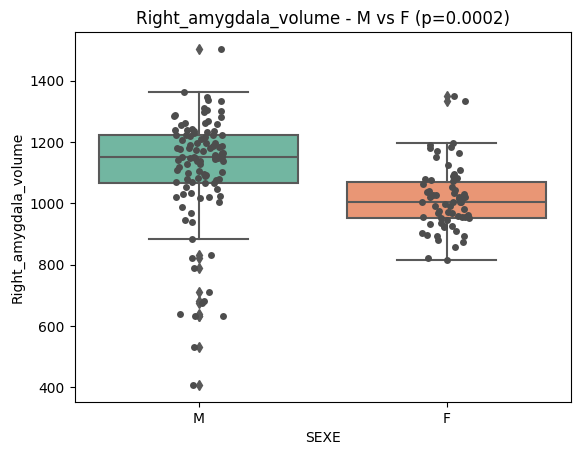

T-test for Right_amygdala_R2_median : p-value=0.07564
T-test for Right_amygdala_R2_mean : p-value=0.07599
T-test for Right_amygdala_QSM_median : p-value=0.81938
T-test for Right_amygdala_QSM_mean : p-value=0.87591
T-test for Right_amygdala_QSM_positive_median : p-value=0.17413
T-test for Right_amygdala_QSM_positive_mean : p-value=0.16439
T-test for Right_amygdala_QSM_kurtosis : p-value=0.36803
Processing region ID: ('Right_hippocampus', 47)
T-test for Right_hippocampus_volume : p-value=0.00189


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


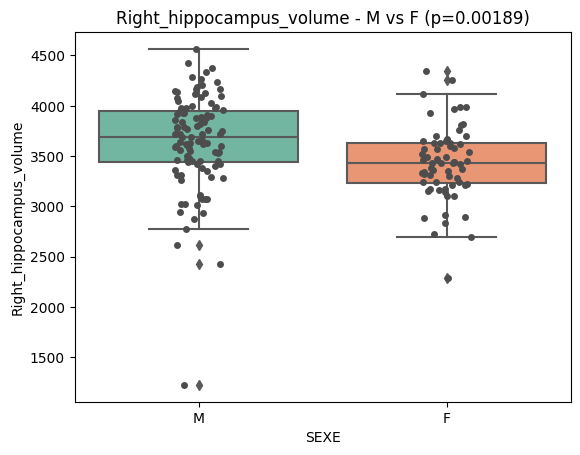

T-test for Right_hippocampus_R2_median : p-value=0.17
T-test for Right_hippocampus_R2_mean : p-value=0.2467
T-test for Right_hippocampus_QSM_median : p-value=0.63652
T-test for Right_hippocampus_QSM_mean : p-value=0.93717
T-test for Right_hippocampus_QSM_positive_median : p-value=0.96015
T-test for Right_hippocampus_QSM_positive_mean : p-value=0.75739
T-test for Right_hippocampus_QSM_kurtosis : p-value=0.40045
Processing region ID: ('Left_amygdala', 32)
T-test for Left_amygdala_volume : p-value=0.0


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


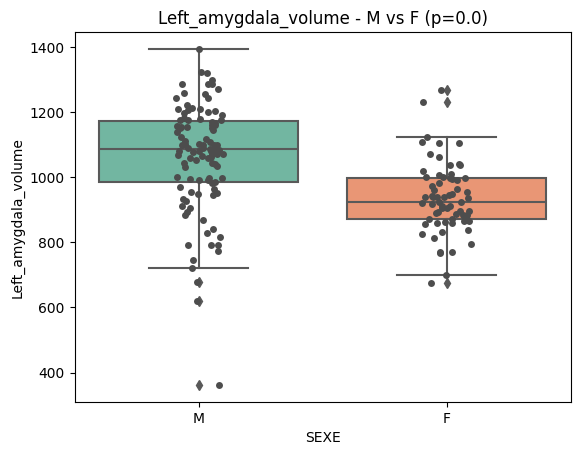

T-test for Left_amygdala_R2_median : p-value=0.111
T-test for Left_amygdala_R2_mean : p-value=0.20121
T-test for Left_amygdala_QSM_median : p-value=0.04976


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


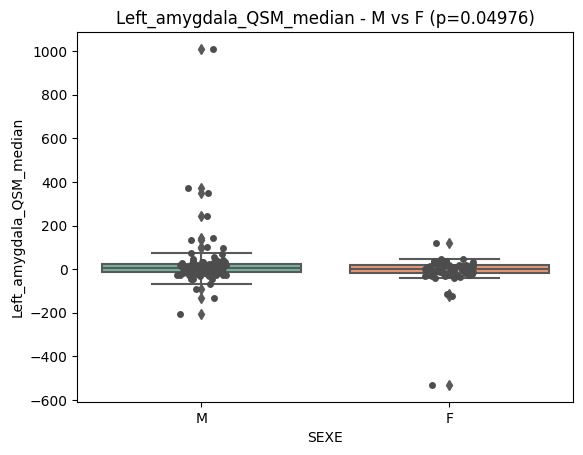

/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


T-test for Left_amygdala_QSM_mean : p-value=0.02967


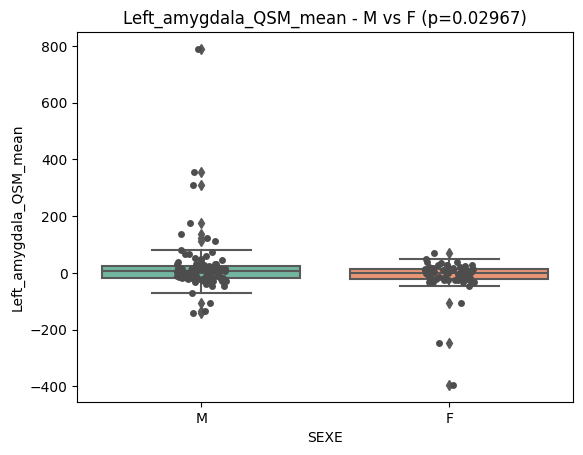

T-test for Left_amygdala_QSM_positive_median : p-value=0.17588
T-test for Left_amygdala_QSM_positive_mean : p-value=0.20784
T-test for Left_amygdala_QSM_kurtosis : p-value=0.63795
Processing region ID: ('Left_hippocampus', 48)
T-test for Left_hippocampus_volume : p-value=5e-05


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


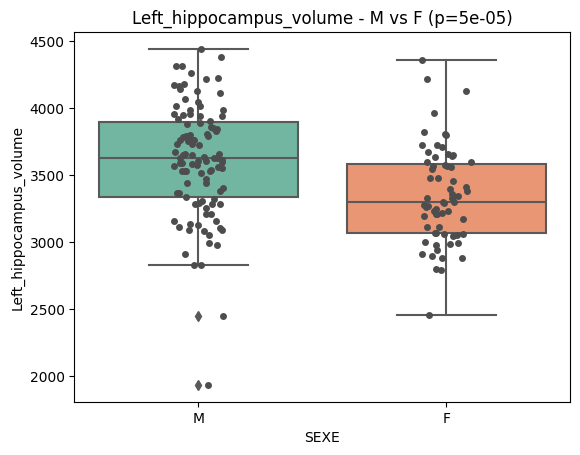

T-test for Left_hippocampus_R2_median : p-value=0.18294
T-test for Left_hippocampus_R2_mean : p-value=0.39164
T-test for Left_hippocampus_QSM_median : p-value=0.27525
T-test for Left_hippocampus_QSM_mean : p-value=0.17623
T-test for Left_hippocampus_QSM_positive_median : p-value=0.08014
T-test for Left_hippocampus_QSM_positive_mean : p-value=0.06782
T-test for Left_hippocampus_QSM_kurtosis : p-value=0.46035


In [163]:
reload(lbr)
pd.option_context('mode.use_inf_as_na', True)
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    lbr.regress_covar_func(columns_with_region_name[1:],['AGE','Diff_inclusion_PS',columns_with_region_name[0]],df_test.dropna(axis=1),df_test.dropna(axis=1), display=False)
    lbr.test_covar_funcOnTwoGroups(columns_with_region_name,df_test,'SEXE','M','F', 0.05)

In [164]:
df_test

,Declin,AGE,SEXE,SITE_APP,Centre,V0,Diff_inclusion_PS,Score_de_declinaison,Right_amygdala_volume,Right_hippocampus_volume,...,Left_amygdala_QSM_positive_median,Left_amygdala_QSM_positive_mean,Left_amygdala_QSM_kurtosis,Left_hippocampus_R2_median,Left_hippocampus_R2_mean,Left_hippocampus_QSM_median,Left_hippocampus_QSM_mean,Left_hippocampus_QSM_positive_median,Left_hippocampus_QSM_positive_mean,Left_hippocampus_QSM_kurtosis
participant_id,,,,,,,,,,,,,,,,,,,,,
01002KAP,Slow,68,M,Bulbaire,Lille,34.0,11.0,0.551433,1052,3550,...,7.128472,8.332505,-0.269598,25.908082,26.696226,-22.718446,-20.217827,15.769661,24.793832,7.730161
01005AGP,Slow,51,M,Membre inférieur,Lille,43.0,14.0,0.316186,1255,3915,...,22.628538,27.385738,0.707653,24.388896,24.766884,-3.733412,-0.433630,18.867949,26.765772,2.011974
01006SCP,Slow,55,M,Membre inférieur,Lille,46.0,18.0,0.088537,1336,3818,...,14.890385,31.513111,9.006453,24.214032,24.890451,-12.355792,-13.592927,7.381349,13.129809,5.023013
01007LAP,Fast,63,F,Membre inférieur,Lille,39.0,13.0,0.741379,857,2913,...,3.129960,4.675722,0.156449,24.429229,24.607643,-29.276531,-25.217711,14.905540,26.917514,4.723622
01008LBP,Fast,53,F,Bulbaire,Lille,29.0,19.0,1.018623,1031,3380,...,16.537092,37.312157,7.351612,25.501065,26.460277,-17.027255,-14.360923,17.859030,27.481989,4.655032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19035SPP,Slow,59,M,Membre supérieur,Angers,41.0,21.0,0.333333,1333,3591,...,100.885581,102.085645,12.623816,24.936971,25.347340,64.125186,56.528355,76.417607,84.313595,4.278896
19036CJP,Fast,73,F,Membre inférieur,Angers,39.0,23.0,0.681200,947,3991,...,36.295983,38.073619,4.369459,23.369864,24.056316,6.970595,0.055377,34.804368,39.470661,2.494723
19037GHP,Slow,65,M,Membre inférieur,Angers,43.0,12.0,0.183707,1151,3646,...,72.569481,75.784966,2.848416,23.352849,24.234783,19.657756,15.787775,46.591714,51.347742,1.495801


In [ ]:
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    print(f"Columns with region name: {columns_with_region_name[1:]}")
    print(f"RV Initial number of rows: {len(df_test)}")
    test=lbr.remove_outliers_bygroup(df_test,columns_with_region_name[1:], 'Declin', nb_std=1,verbose=True)
    df_test.groupby('Declin').apply(lambda x: filter_group(x, columns_with_region_name[1:], 3)).reset_index(drop=True)
    #    return df.groupby(group).apply(lambda x: filter_group(x, variable, nb_std)).reset_index(drop=True)
    print(f"RV Final number of rows: {len(test)}")
    lbr.test_covar_funcOnTwoGroups(columns_with_region_name[1:], df_test, 'Declin', 'Slow', 'Fast',1)

Processing region ID: ('Right_amygdala', 31)
Columns with region name: ['Right_amygdala_R2_median', 'Right_amygdala_R2_mean', 'Right_amygdala_QSM_median', 'Right_amygdala_QSM_mean', 'Right_amygdala_QSM_positive_median', 'Right_amygdala_QSM_positive_mean', 'Right_amygdala_QSM_kurtosis']
RV Initial number of rows: 171
Removing outliers for variable '['Right_amygdala_R2_median', 'Right_amygdala_R2_mean', 'Right_amygdala_QSM_median', 'Right_amygdala_QSM_mean', 'Right_amygdala_QSM_positive_median', 'Right_amygdala_QSM_positive_mean', 'Right_amygdala_QSM_kurtosis']' by group 'Declin' with 1 standard deviations.
Initial number of rows: 171
       Right_amygdala_R2_median           Right_amygdala_R2_mean            \
                           mean       std                   mean       std   
Declin                                                                       
Fast                  23.861096  1.165967              24.292196  1.275057   
Slow                  24.490438  5.547160      

KeyError: 'Declin'

In [ ]:
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    print(f"Columns with region name: {columns_with_region_name[1:]}")
    lbr.test_covar_funcWithANOVA(columns_with_region_name[1:], df_test, 'SITE_APP',1)